## Exercice 5 : Boundary Value Problem (BVP) inhomogène linéaire
Intégrer avec en utilisant les différences centrées d'ordre deux le problème différentiel
$$ \frac{d^2u}{dx^2} + u = e^{x} \quad \forall x \in \left[0, \frac{3\pi}{2}\right] $$

pour les conditions de Dirichelet et Neumann suivantes :

1.  $u(0) = 0$ et $u\left(3\pi/2\right) = 0$
2.  $\frac{du}{dx}_{x=0} = 0$ et $\frac{du}{dx}_{x=3\pi/2} = 0$

## Solution :
### Différences centrées d'ordre 2 :
$${\frac{d^2u}{dx^2}}_{x=x_i} \approx \frac{u_{i+1}-2u_{i}+u_{i-1}}{h^2}$$

En l'appliquant à notre situation, on obtient la discrétisation suivante :
$$ \frac{u_{i+1}-2u_{i}+u_{i-1}}{h^2} + u_i = e^{x_i} $$
$$ \Leftrightarrow a_i u_{i+1} + b_i u_i + c_i u_{i-1} = h^2 f_i$$
avec $a_i = 1$, $b_i = -2 + h^2$, $c_i = 1$ et $f_i = e^{x_i}$ $\forall i$.

De plus, on a $x_0 = 0$ et $x_{N+1} = \frac{3\pi}{2}$. 

Donc, $x_i = ih$ avec $h = \frac{3\pi}{2(N+1)}$.

Il s'agit d'un système d'équation linéaire qui peut se représenter sous forme matricielle; il faut néanmoins spécifier les conditions aux bords.
#### Conditions de Dirichelet :
Pour $i = 1$, on trouve : $a_1 u_{2} + b_1 u_{1} + c_1 u_{0} = h^2 f_1 \Leftrightarrow a_1 u_{2} + b_1 u_{1} = h^2 f_1 - c_1 u_{0}$ car $u_0$ est une constante.

Pour $i = N$, on trouve : $a_N u_{N+1} + b_N u_{N} + c_N u_{N-1} = h^2 f_N \Leftrightarrow b_N u_{N} + c_N u_{N-1} = h^2 f_N - a_N u_{N+1}$ car $u_{N+1}$ est une constante.

On en déduit donc le système suivant :
$$
\begin{pmatrix}
b_{1} & a_{1} & 0 &\cdots & \cdots &  0\\
c_{2} & b_{2} & a_{2} & 0 & \cdots & 0  \\
0 & \ddots & \ddots & \ddots &  \ddots &\vdots  \\
\vdots & \ddots  & \ddots & \ddots & \ddots & 0  \\
0 & \cdots  & 0& c_{N-1} & b_{N-1} & a_{N-1}  \\
0 & \cdots  & 0 & 0 & c_{N} & b_{N} 
\end{pmatrix}
\begin{pmatrix}
u_{1}\\
u_{2}\\
\vdots\\
\vdots\\
u_{N-1}\\
u_{N}\\
\end{pmatrix}
=\begin{pmatrix}
h^2f_{1}-c_1u_0\\
h^2f_{2}\\
\vdots\\
\vdots\\
h^2f_{N-1}\\
h^2f_{N}-a_N u_{N+1}\\
\end{pmatrix}
$$


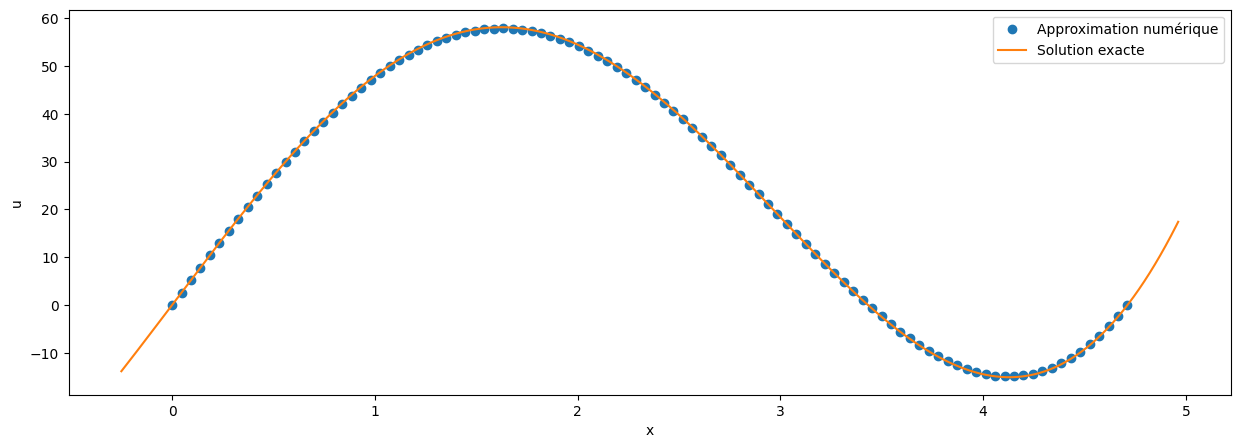

In [1]:
import numpy as np
import matplotlib.pyplot as plt
## Solution pour les conditions de Dirichelet
u0, unp1 = 0.0, 0.0
N = 100
h = 1/(N+1) * 3.0*np.pi/2.0

# Matrice tridiagonale creuse
# A_Dirichelet = sp.sparse.diags([1.0, -2.0+h**2, 1.0], [-1, 0, 1], shape=(N, N))
A_Dirichelet = np.zeros((N, N))
for i in range(N):
    A_Dirichelet[i, i] = -2.0 + h**2
    if i > 0:
        A_Dirichelet[i, i-1] = 1.0
    if i < N-1:
        A_Dirichelet[i, i+1] = 1.0
        
b_Dirichelet = np.zeros(N)
for i in range(N-1):
    b_Dirichelet[i] = h**2 * np.exp((i+1)*h)
    
b_Dirichelet[0] -= u0
b_Dirichelet[-1] -= unp1

# Résolution du système linéaire
u_Dirichelet = np.linalg.solve(A_Dirichelet, b_Dirichelet)
x_Dirichelet = np.linspace(0, 3.0*np.pi/2.0, N+2) # N+2 because of the initial additional point

# Solution exacte
x_true_Dirichelet = np.linspace(-0.25, 3.0*np.pi/2.0 + 0.25, 1000)
u_true_Dirichelet = 1/2 * (np.exp(x_true_Dirichelet) - np.cos(x_true_Dirichelet) + np.exp(3*np.pi/2)*np.sin(x_true_Dirichelet))

# Plot
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(x_Dirichelet, np.concatenate(([u0], u_Dirichelet, [unp1])), 'o', label='Approximation numérique')
ax.plot(x_true_Dirichelet, u_true_Dirichelet, label='Solution exacte')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('u')
plt.show()


#### Conditions de Neumann :
Dans ce cas, il faut trouver des équations supplémentaires permettant de discrétiser la dérivée première au début et a la fin du domaine. Afin de garder un ordre 2, nous utiliserons ici les différences en amont et en aval d'ordre 2 :
$$ \frac{du}{dx}_{x=x_0} \approx \frac{-3u_0 + 4 u_1 - u_2}{2h} $$

$$ \frac{du}{dx}_{x=x_{N+1}} \approx \frac{3u_{N+1} - 4 u_{N} + u_{N-1}}{2h} $$

On se retrouve donc avec la même matrice que pour Dirichelet mais avec cette fois-ci deux équations supplémentaires pour $u_0$ et $u_{N+1}$. Pour résoudre, il suffit donc de rajouter une ligne au dessus et au dessous de la matrice pour ainsi obtenir le système suivant :
$$
\begin{pmatrix}
-3 & 4 & -1 & 0 & \cdots & 0\\
b_{1} & a_{1} & 0 &\cdots & \cdots &  0\\
c_{2} & b_{2} & a_{2} & 0 & \cdots & 0  \\
0 & \ddots & \ddots & \ddots &  \ddots &\vdots  \\
\vdots & \ddots  & \ddots & \ddots & \ddots & 0  \\
0 & \cdots  & 0& c_{N-1} & b_{N-1} & a_{N-1}  \\
0 & \cdots  & 0 & 0 & c_{N} & b_{N} \\
0 & \cdots & 0 & 1 & -4 & 3
\end{pmatrix}
\begin{pmatrix}
u_0\\
u_{1}\\
u_{2}\\
\vdots\\
\vdots\\
u_{N-1}\\
u_{N}\\
u_{N+1}\\
\end{pmatrix}
=\begin{pmatrix}
2hu'_0\\
h^2f_{1}\\
h^2f_{2}\\
\vdots\\
\vdots\\
h^2f_{N-1}\\
h^2f_{N}\\
2hu'_{N+1}
\end{pmatrix}
$$

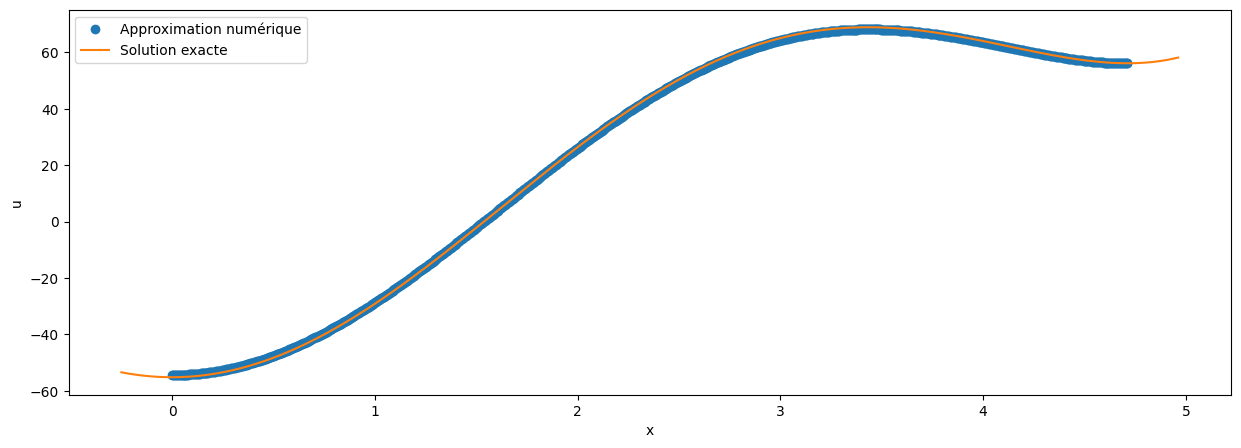

In [2]:
# Solution pour les conditions de Neumann
du0, dunp1 = 0.0, 0.0
N = 1_000
h = 1/(N+1) * 3.0*np.pi/2.0

# Matrice tridiagonale creuse
A_Neumann = np.zeros((N+2, N+2))
for i in range(N+2):
    if i == 0 or i == N+1:
        continue
    A_Neumann[i, i] = -2.0 + h**2
    if i > 0:
        A_Neumann[i, i-1] = 1.0
    if i < N+1:
        A_Neumann[i, i+1] = 1.0

A_Neumann[0, 0] = -3.0
A_Neumann[-1, -1] = 3.0
A_Neumann[0, 1] = 4.0
A_Neumann[-1, -2] = -4.0
A_Neumann[0, 2] = -1.0
A_Neumann[-1, -3] = 1.0

b_Neumann = np.zeros(N+2)
for i in range(N-1):
    b_Neumann[i+1] = h**2 * np.exp((i+1)*h)
    
b_Neumann[0] = 2*h*du0
b_Neumann[-1] = 2*h*dunp1

# Résolution du système linéaire
u_Neumann = np.linalg.solve(A_Neumann, b_Neumann)
x_Neumann = np.linspace(0, 3.0*np.pi/2.0, N+2) # N+2 because of the initial additional point

# Solution exacte
x_true = np.linspace(-0.25, 3.0*np.pi/2.0 + 0.25, 1000)
u_true = 1/2 * (np.exp(x_true) - np.sin(x_true) - np.exp(3*np.pi/2)*np.cos(x_true))

# Plot
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(x_Neumann, u_Neumann, 'o', label='Approximation numérique')
ax.plot(x_true, u_true, label='Solution exacte')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('u')
plt.show()

In [3]:
%reset -f